      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

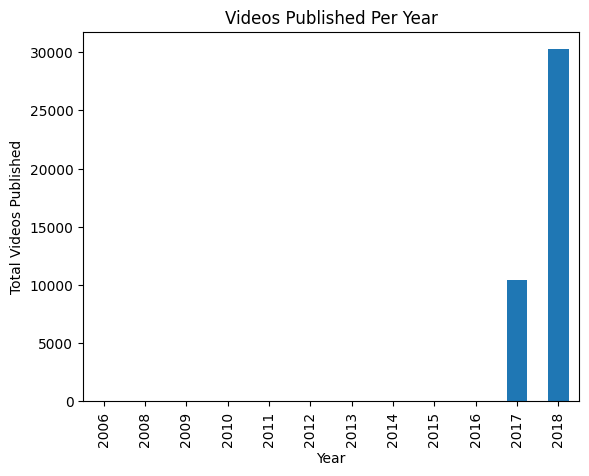

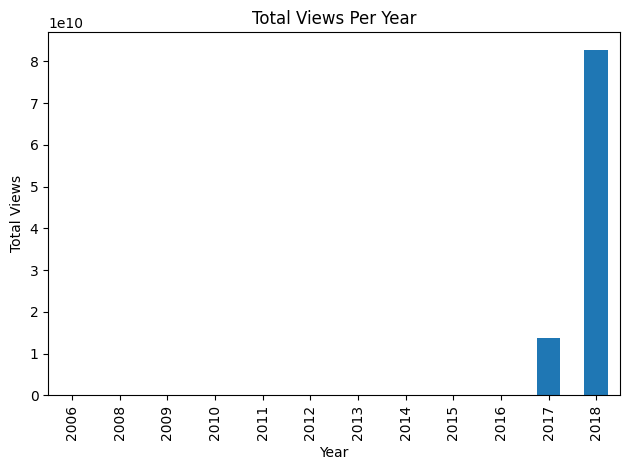

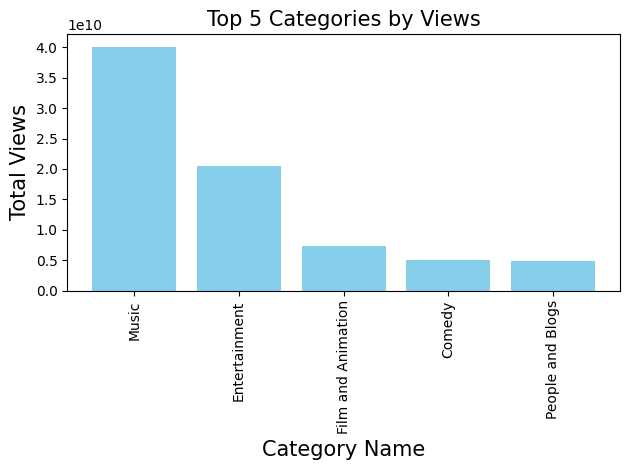

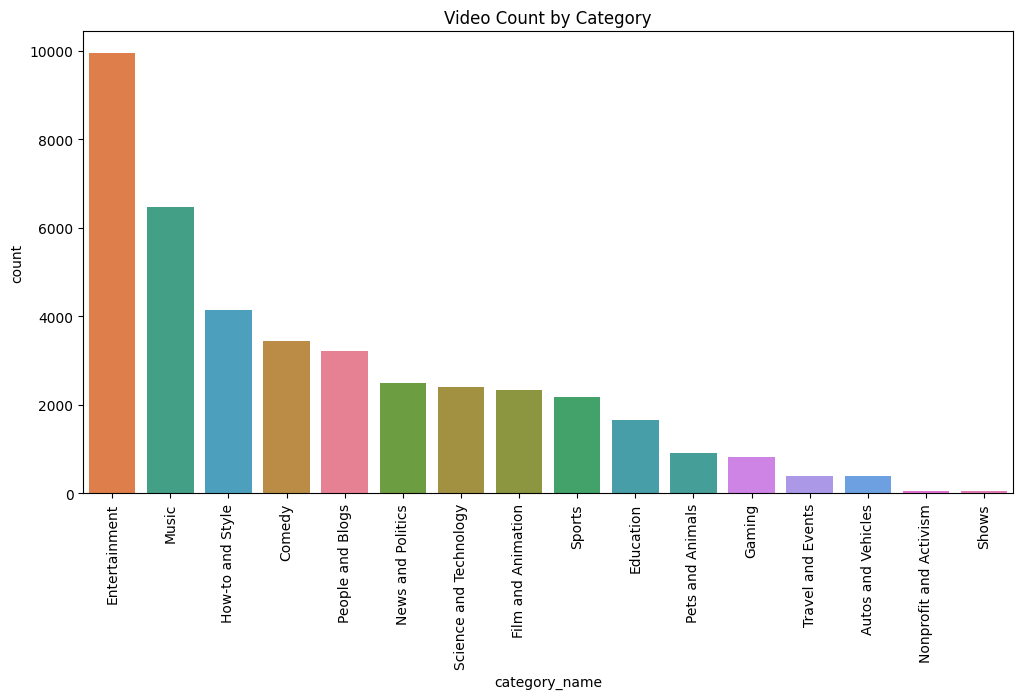

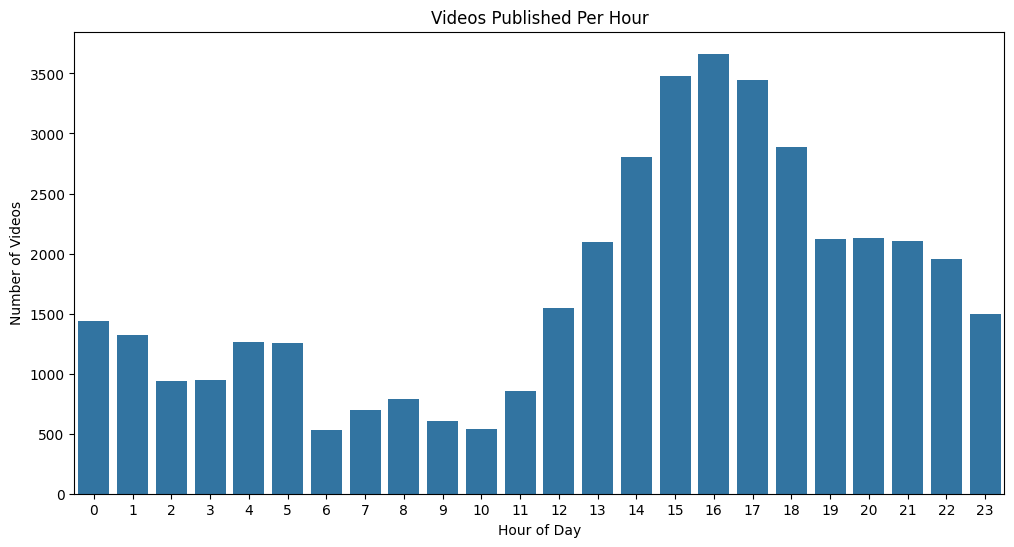

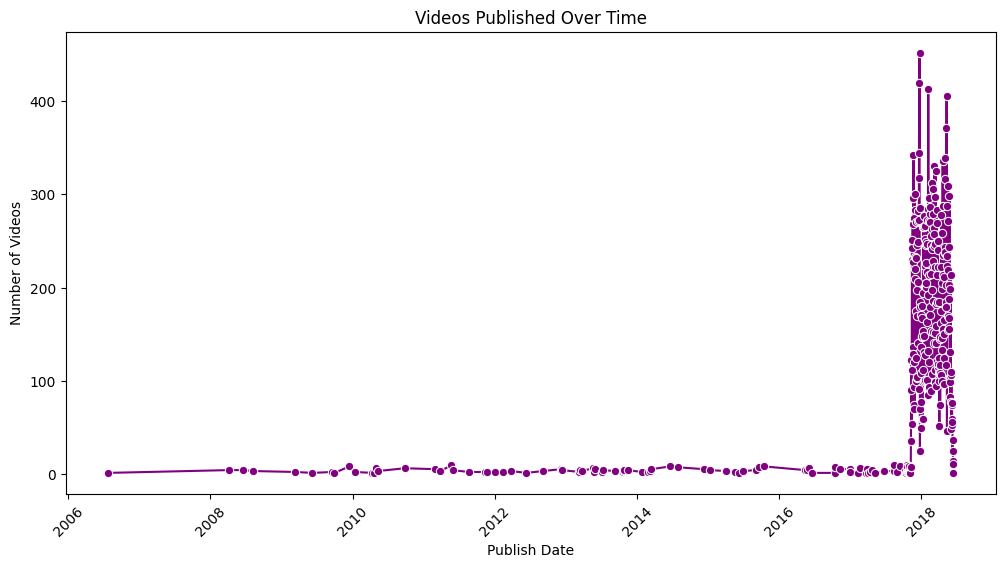

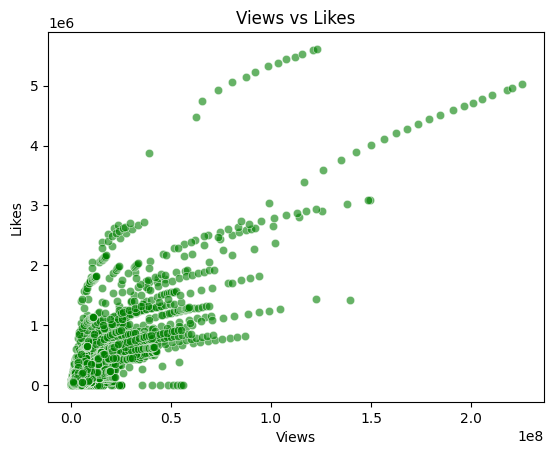

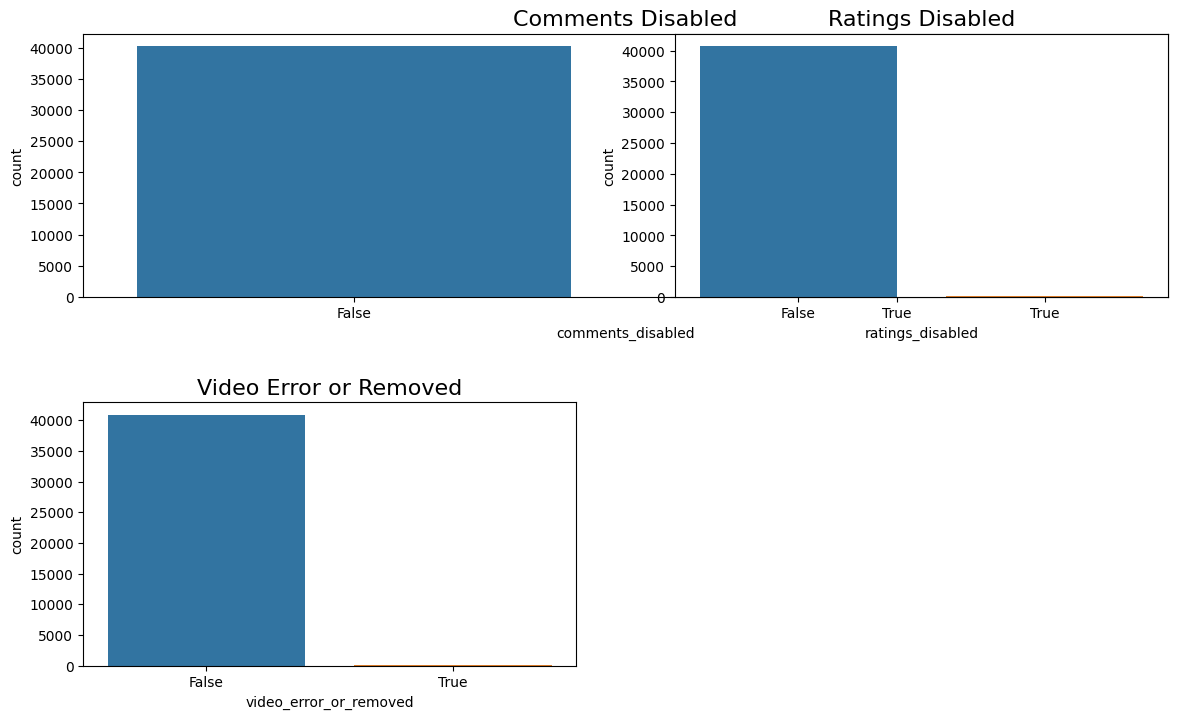

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv('USvideos.csv')
pd.set_option('display.max_columns', 50)

# Display basic information
print(df.head(), "\n", "*" * 200)
print(df.shape, "\n", "*" * 200)

# Remove duplicates
df = df.drop_duplicates()
print(df.shape, "\n", "*" * 200)

# Display descriptive statistics
print(df.describe(), "\n", "*" * 200)

# Display dataset info
print(df.info(), "\n", "*" * 200)

# Drop unnecessary columns
remove_columns = ['thumbnail_link', 'description']
df = df.drop(columns=remove_columns)
print(df.info(), "\n", "*" * 200)

# Convert trending_date to datetime
df["trending_date"] = df["trending_date"].apply(lambda x: datetime.strptime(x, "%y.%d.%m"))

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Extract additional datetime features
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour
df['year'] = df['publish_time'].dt.year

# Map category_id to category_name
category_map = {
    1: 'Film and Animation', 2: 'Autos and Vehicles', 10: 'Music', 15: 'Pets and Animals', 
    17: 'Sports', 19: 'Travel and Events', 20: 'Gaming', 22: 'People and Blogs', 
    23: 'Comedy', 24: 'Entertainment', 25: 'News and Politics', 26: 'How-to and Style', 
    27: 'Education', 28: 'Science and Technology', 29: 'Nonprofit and Activism', 
    30: 'Movies', 43: 'Shows'
}
df['category_name'] = df['category_id'].map(category_map)

print(df.head(), "\n", "*" * 200)

# Visualizations

# 1. Total videos published per year
yearly_counts = df.groupby('year')['video_id'].count()
yearly_counts.plot(kind='bar', xlabel='Year', ylabel='Total Videos Published', title='Videos Published Per Year')
plt.show()

# 2. Total views per year
yearly_views = df.groupby('year')['views'].sum()
yearly_views.plot(kind='bar', xlabel='Year', ylabel='Total Views', title='Total Views Per Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Top 5 categories by views
category_views = df.groupby('category_name')['views'].sum().reset_index()
top_categories = category_views.sort_values(by='views', ascending=False).head(5)
plt.bar(top_categories['category_name'], top_categories['views'], color='skyblue')
plt.xlabel('Category Name', fontsize=15)
plt.ylabel('Total Views', fontsize=15)
plt.title('Top 5 Categories by Views', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Video count by category (fixed warning for palette)
plt.figure(figsize=(12, 6))
sns.countplot(
    x='category_name', 
    data=df, 
    order=df['category_name'].value_counts().index,
    hue='category_name',  # Assign x to hue
    dodge=False,          # Ensures a single bar per category
    legend=False          # Disables redundant legend
)
plt.xticks(rotation=90)
plt.title('Video Count by Category')
plt.show()

# 5. Videos published per hour
videos_per_hour = df['publish_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, hue=None, dodge=False)
plt.title('Videos Published Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()


# 6. Videos published over time (line plot)
df['publish_date'] = df['publish_time'].dt.date
videos_count_by_date = df.groupby('publish_date').size()
plt.figure(figsize=(12, 6))
sns.lineplot(data=videos_count_by_date, marker='o', color='purple')
plt.title('Videos Published Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

# 7. Scatter plot of views vs likes
sns.scatterplot(data=df, x='views', y='likes', alpha=0.6, color='green')
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

# 8. Distribution of boolean flags (Fixed warnings)
plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)

plt.subplot(2, 1, 1)
sns.countplot(x='comments_disabled', data=df, hue='comments_disabled', dodge=False, legend=False)
plt.title('Comments Disabled', fontsize=16)

plt.subplot(2, 2, 2)
sns.countplot(x='ratings_disabled', data=df, hue='ratings_disabled', dodge=False, legend=False)
plt.title('Ratings Disabled', fontsize=16)

plt.subplot(2, 2, 3)
sns.countplot(x='video_error_or_removed', data=df, hue='video_error_or_removed', dodge=False, legend=False)
plt.title('Video Error or Removed', fontsize=16)

plt.show()